<h1><center><font size="6">Holdout Set Notebook</font></center></h1>

# Contents

- <a href='#1'>Importing Packages</a> 
- <a href='#3'>VGG16-Based CNN Model</a>
- <a href='#4'>Simplified CNN Model</a>
- <a href='#5'>Alexnet Model</a>
- <a href='#6'>ResNet50 Model</a>
- <a href='#7'>VGG19 Model</a>
- <a href='#6'>MobileNet Model</a>

 


# Importing Packages

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

import warnings
warnings.simplefilter("ignore")

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16

from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

from utils import *

%reload_ext autoreload
%autoreload 2

# VGG16-Based CNN Model

## Generating Datasets

In [35]:
# generate holdout datasets

test_folder = '../split/test'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size = (256, 256),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

test_folder_2 = '../split/test2'
test_generator_2 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder_2,
        target_size = (256, 256),
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False,
        seed = 42)
STEP_SIZE_TEST_2 = test_generator_2.n // test_generator_2.batch_size

Found 3766 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Loading Best Model

In [34]:
# load entire model after training proccess
model_vgg16 = load_model('../logs/log_vgg16/model.16-0.15.hdf5')

## Evaluating on Entire Holdout Dataset

3766/3766 [==============================] - 1871s 496ms/step


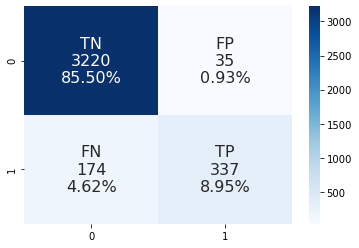

In [7]:
# display confusion matrix visualization
pred = model_vgg16.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred = pred > 0.5
make_confusion_matrix(y_true, y_pred)

In [23]:
# get testing accuracy and loss
test_generator.reset()
score = model_vgg16.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]))
print("Precision: " + str(score[2]))
print("Recall: " + str(score[3]))
print("ROC-AUC: " + str(score[4]))
print("PR-AUC: " + str(score[5]))

3766/3766 [==============================] - 1749s 463ms/step - loss: 0.1495 - accuracy: 0.9445 - auc: 0.9599 - auc_1: 0.8707 - precision: 0.9059 - recall: 0.6595
Loss: 0.14954344928264618
Accuracy: 0.9445034265518188
Precision: 0.9598882794380188
Recall: 0.8707482218742371
ROC-AUC: 0.9059139490127563
PR-AUC: 0.6594911813735962


## Evaluating on Additional Holdout Set

2000/2000 [==============================] - 814s 407ms/step


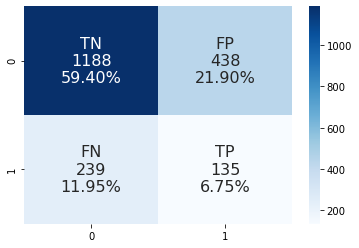

In [36]:
# display confusion matrix visualization
pred_1a = model_vgg16.predict_generator(test_generator_2, steps = STEP_SIZE_TEST_2, verbose = 1)
y_true_2 = test_generator_2.classes
y_pred_1a = pred_1a > 0.5
make_confusion_matrix(y_true_2, y_pred_1a)

In [24]:
# get testing accuracy and loss
test_generator_2.reset()
score_1a = model_vgg16.evaluate_generator(test_generator_2, verbose = 1)

print("Loss: " + str(score_1a[0]))
print("Accuracy: " + str(score_1a[1]))
print("Precision: " + str(score_1a[2]))
print("Recall: " + str(score_1a[3]))
print("ROC-AUC: " + str(score_1a[4]))
print("PR-AUC: " + str(score_1a[5]))

2000/2000 [==============================] - 895s 448ms/step - loss: 0.7754 - accuracy: 0.6615 - auc: 0.5759 - auc_1: 0.2434 - precision: 0.2356 - recall: 0.3610
Loss: 0.7754238843917847
Accuracy: 0.6614999771118164
Precision: 0.5759203433990479
Recall: 0.24342678487300873
ROC-AUC: 0.23560209572315216
PR-AUC: 0.36096256971359253


# Simplified CNN Model

## Generating Datasets

In [38]:
test_fldr = '../split/test'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (256, 256),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

test_fldr_2 = '../split/test2'
test_generator_2 = ImageDataGenerator(rescale=1/255).flow_from_directory(
        test_fldr_2,
        target_size = (256, 256),
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False,
        seed = 42)
STEP_SIZE_TEST_2 = test_generator_2.n // test_generator_2.batch_size

Found 3766 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Loading Best Model

In [37]:
model_cnn = load_model('../logs/log_cnn/model.09-0.17.hdf5')

## Predicting on Entire Testing Dataset

3766/3766 [==============================] - 1002s 266ms/step


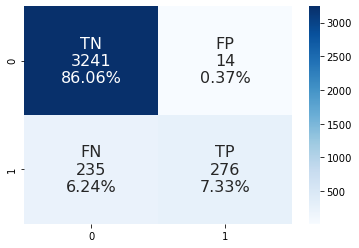

In [4]:
# display confusion matrix visualization
test_generator.reset()
pred_2 = model_cnn.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred_2 = pred_2 > 0.5
make_confusion_matrix(y_true, y_pred_2)

In [28]:
# get testing accuracy and loss
test_generator.reset()
score_2 = model_cnn.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score_2[0]))
print("Accuracy: " + str(score_2[1]))
print("Precision: " + str(score_2[2]))
print("Recall: " + str(score_2[3]))
print("ROC-AUC: " + str(score_2[4]))
print("PR-AUC: " + str(score_2[5]))

3766/3766 [==============================] - 3235s 857ms/step - loss: 0.2067 - accuracy: 0.9320 - auc: 0.9305 - auc_1: 0.9844 - precision: 0.9610 - recall: 0.9604
Loss: 0.20669563114643097
Accuracy: 0.9320233464241028
Precision: 0.9304919242858887
Recall: 0.9843703508377075
ROC-AUC: 0.9609591364860535
PR-AUC: 0.9603686928749084


## Predicting on Additional Holdout Dataset

2000/2000 [==============================] - 412s 206ms/step


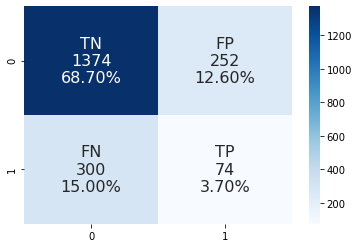

In [4]:
# display confusion matrix visualization
test_generator_2.reset()
pred_2a = model_cnn.predict_generator(test_generator_2, steps = STEP_SIZE_TEST_2, verbose = 1)
y_true_2 = test_generator_2.classes
y_pred_2a = pred_2a > 0.5
make_confusion_matrix(y_true_2, y_pred_2a)

In [39]:
# get testing accuracy and loss
test_generator_2.reset()
score_2a = model_cnn.evaluate_generator(test_generator_2, verbose = 1)

print("Loss: " + str(score_2a[0]))
print("Accuracy: " + str(score_2a[1]))
print("Precision: " + str(score_2a[2]))
print("Recall: " + str(score_2a[3]))
print("ROC-AUC: " + str(score_2a[4]))
print("PR-AUC: " + str(score_2a[5]))

2000/2000 [==============================] - 352s 176ms/step - loss: 0.6381 - accuracy: 0.7240 - auc: 0.5591 - auc_1: 0.2290 - precision: 0.2270 - recall: 0.1979
Loss: 0.6380660533905029
Accuracy: 0.7239999771118164
Precision: 0.5590817332267761
Recall: 0.22900386154651642
ROC-AUC: 0.2269938588142395
PR-AUC: 0.1978609561920166


# AlexNet

## Generating Holdout Datasets

In [31]:
test_fldr = '../split/test'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (227, 227),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

test_fldr_2 = '../split/test2'
test_generator_2 = ImageDataGenerator(rescale=1/255).flow_from_directory(
        test_fldr_2,
        target_size = (227, 227),
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False,
        seed = 42)
STEP_SIZE_TEST_2 = test_generator_2.n // test_generator_2.batch_size

Found 3766 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Loading Best Model

In [32]:
# load entire model after training proccess
model_alex = load_model('../logs/log_alexnet/model.12-0.17.hdf5')

## Predicting on Entire Testing Dataset

3766/3766 [==============================] - 1082s 287ms/step


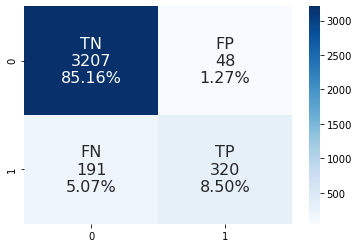

In [6]:
# display confusion matrix visualization
pred_3 = model_alex.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred_3 = pred_3 > 0.5
make_confusion_matrix(y_true, y_pred_3)

In [8]:
# get testing accuracy and loss
test_generator.reset()
score_3 = model_alex.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score_3[0]))
print("Accuracy: " + str(score_3[1]))
print("Precision: " + str(score_3[2]))
print("Recall: " + str(score_3[3]))
print("ROC-AUC: " + str(score_3[4]))
print("PR-AUC: " + str(score_3[5]))

3766/3766 [==============================] - 983s 261ms/step - loss: 0.1779 - accuracy: 0.9365 - precision_1: 0.8696 - recall_1: 0.6262 - auc_2: 0.9477 - auc_3: 0.8364
Loss: 0.177850604057312
Accuracy: 0.9365374445915222
Precision: 0.8695651888847351
Recall: 0.626223087310791
ROC-AUC: 0.947671115398407
PR-AUC: 0.8363977074623108


## Predicting on Additional Holdout Set

2000/2000 [==============================] - 545s 272ms/step


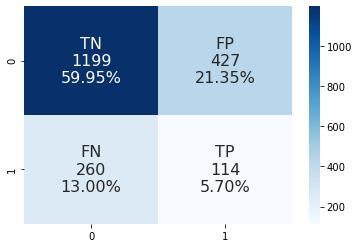

In [9]:
# display confusion matrix visualization
test_generator_2.reset()
pred_3a = model_alex.predict_generator(test_generator_2, steps = STEP_SIZE_TEST_2, verbose = 1)
y_true_2 = test_generator_2.classes
y_pred_3a = pred_3a > 0.5
make_confusion_matrix(y_true_2, y_pred_3a)

In [33]:
# get testing accuracy and loss
test_generator_2.reset()
score_3a = model_alex.evaluate_generator(test_generator_2, verbose = 1)

print("Loss: " + str(score_3a[0]))
print("Accuracy: " + str(score_3a[1]))
print("Precision: " + str(score_3a[2]))
print("Recall: " + str(score_3a[3]))
print("ROC-AUC: " + str(score_3a[4]))
print("PR-AUC: " + str(score_3a[5]))

2000/2000 [==============================] - 386s 193ms/step - loss: 0.7604 - accuracy: 0.6565 - precision_1: 0.2107 - recall_1: 0.3048 - auc_2: 0.5407 - auc_3: 0.2247
Loss: 0.7604184150695801
Accuracy: 0.656499981880188
Precision: 0.21072088181972504
Recall: 0.30481284856796265
ROC-AUC: 0.5407417416572571
PR-AUC: 0.2246728390455246


# ResNet50

## Generating Datasets

In [15]:
test_fldr = '../split/test'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (224, 224),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

test_fldr_2 = '../split/test2'
test_generator_2 = ImageDataGenerator(rescale=1/255).flow_from_directory(
        test_fldr_2,
        target_size = (224, 224),
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False,
        seed = 42)
STEP_SIZE_TEST_2 = test_generator_2.n // test_generator_2.batch_size

Found 3766 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Loading Best Model

In [16]:
# load entire model after training proccess
model_res = load_model('../logs/log_resnet_2/model.07-0.20.hdf5')

## Predicting on entire testing dataset

3766/3766 [==============================] - 1615s 429ms/step


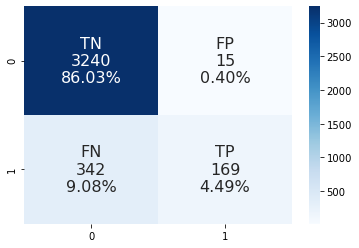

In [17]:
# display confusion matrix visualization
pred_4 = model_res.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred_4 = pred_4 > 0.5
make_confusion_matrix(y_true, y_pred_4)

In [20]:
# get testing accuracy and loss
test_generator.reset()
score_4 = model_res.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score_4[0]))
print("Accuracy: " + str(score_4[1]))
print("Precision: " + str(score_4[2]))
print("Recall: " + str(score_4[3]))
print("ROC-AUC: " + str(score_4[4]))
print("PR-AUC: " + str(score_4[5]))

3766/3766 [==============================] - 2237s 593ms/step - loss: 0.2262 - accuracy: 0.9052 - precision: 0.9185 - recall: 0.3307 - auc: 0.9382 - auc_1: 0.8032
Loss: 0.22622588276863098
Accuracy: 0.9052044749259949
Precision: 0.91847825050354
Recall: 0.3307240605354309
ROC-AUC: 0.9382346868515015
PR-AUC: 0.8032458424568176


## Predicting on additional holdout set

2000/2000 [==============================] - 1064s 531ms/step


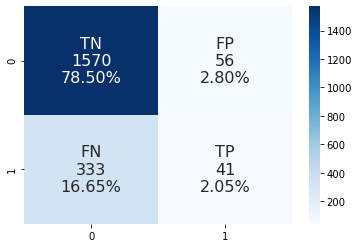

In [19]:
# display confusion matrix visualization
test_generator_2.reset()
pred_4a = model_res.predict_generator(test_generator_2, steps = STEP_SIZE_TEST_2, verbose = 1)
y_true_2 = test_generator_2.classes
y_pred_4a = pred_4a > 0.5
make_confusion_matrix(y_true_2, y_pred_4a)

In [21]:
# get testing accuracy and loss
test_generator_2.reset()
score_4a = model_res.evaluate_generator(test_generator_2, verbose = 1)

print("Loss: " + str(score_4a[0]))
print("Accuracy: " + str(score_4a[1]))
print("Precision: " + str(score_4a[2]))
print("Recall: " + str(score_4a[3]))
print("ROC-AUC: " + str(score_4a[4]))
print("PR-AUC: " + str(score_4a[5]))

2000/2000 [==============================] - 1060s 530ms/step - loss: 0.5616 - accuracy: 0.8055 - precision: 0.4227 - recall: 0.1096 - auc: 0.5887 - auc_1: 0.2598
Loss: 0.5616165995597839
Accuracy: 0.8054999709129333
Precision: 0.42268040776252747
Recall: 0.1096256673336029
ROC-AUC: 0.5886899828910828
PR-AUC: 0.2597648799419403


# MobileNet

## Generating Datasets

In [18]:
test_fldr = '../split/test'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (256, 256),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

test_fldr_2 = '../split/test2'
test_generator_2 = ImageDataGenerator(rescale=1/255).flow_from_directory(
        test_fldr_2,
        target_size = (256, 256),
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False,
        seed = 42)
STEP_SIZE_TEST_2 = test_generator_2.n // test_generator_2.batch_size

Found 3766 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [19]:
# load entire model after training proccess
model_mob = load_model("../logs/log_mobilenet/model.10-0.17.hdf5")

## Predicting on entire testing dataset

3766/3766 [==============================] - 949s 252ms/step


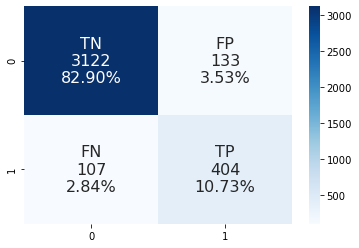

In [20]:
# display confusion matrix visualization
pred_5 = model_mob.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred_5 = pred_5 > 0.5
make_confusion_matrix(y_true, y_pred_5)

In [21]:
# get metrics for holdout set
test_generator.reset()
score_5 = model_mob.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score_5[0]))
print("Accuracy: " + str(score_5[1]))
print("Precision: " + str(score_5[2]))
print("Recall: " + str(score_5[3]))
print("ROC-AUC: " + str(score_5[4]))
print("PR-AUC: " + str(score_5[5]))

3766/3766 [==============================] - 895s 237ms/step - loss: 0.1714 - accuracy: 0.9363 - precision: 0.7523 - recall: 0.7906 - auc: 0.9520 - auc_1: 0.8684
Loss: 0.17142942547798157
Accuracy: 0.9362719058990479
Precision: 0.7523277401924133
Recall: 0.790606677532196
ROC-AUC: 0.9520479440689087
PR-AUC: 0.8683679699897766


## Predicting on Additional Holdout Set

2000/2000 [==============================] - 391s 196ms/step


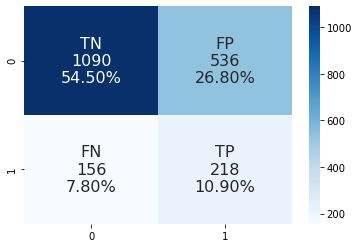

In [25]:
# display confusion matrix visualization
test_generator_2.reset()
pred_5a = model_mob.predict_generator(test_generator_2, steps = STEP_SIZE_TEST_2, verbose = 1)
y_true_2 = test_generator_2.classes
y_pred_5a = pred_5a > 0.5
make_confusion_matrix(y_true_2, y_pred_5a)

In [26]:
# get testing accuracy and loss
test_generator_2.reset()
score_5a = model_mob.evaluate_generator(test_generator_2, verbose = 1)

print("Loss: " + str(score_5a[0]))
print("Accuracy: " + str(score_5a[1]))
print("Precision: " + str(score_5a[2]))
print("Recall: " + str(score_5a[3]))
print("ROC-AUC: " + str(score_5a[4]))
print("PR-AUC: " + str(score_5a[5]))

2000/2000 [==============================] - 643s 321ms/step - loss: 0.6818 - accuracy: 0.6540 - precision: 0.2891 - recall: 0.5829 - auc: 0.6897 - auc_1: 0.3340
Loss: 0.6818389892578125
Accuracy: 0.6539999842643738
Precision: 0.28912466764450073
Recall: 0.5828877091407776
ROC-AUC: 0.6897417306900024
PR-AUC: 0.33397483825683594


# VGG19

## Generating Datasets

In [27]:
test_fldr = '../split/test'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (224, 224),
        seed = 42,
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False)
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size

test_fldr_2 = '../split/test2'
test_generator_2 = ImageDataGenerator(rescale=1/255).flow_from_directory(
        test_fldr_2,
        target_size = (224, 224),
        batch_size = 1,
        class_mode = 'binary',
        shuffle = False,
        seed = 42)
STEP_SIZE_TEST_2 = test_generator_2.n // test_generator_2.batch_size

Found 3766 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Loading Best Model

In [28]:
model_vgg19 = load_model("../logs/log_vgg19/model.10-0.13.hdf5")

## Predicting on Entire Testing Dataset

3766/3766 [==============================] - 1931s 513ms/step


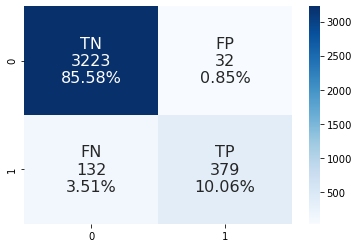

In [12]:
# display confusion matrix visualization
pred_6 = model_vgg19.predict_generator(test_generator, steps = STEP_SIZE_TEST, verbose = 1)
y_true = test_generator.classes
y_pred_6 = pred_6 > 0.5
make_confusion_matrix(y_true, y_pred_6)

In [13]:
# get testing accuracy and loss
test_generator.reset()
score_6 = model_vgg19.evaluate_generator(test_generator, verbose = 1)

print("Loss: " + str(score_6[0]))
print("Accuracy: " + str(score_6[1]))
print("Precision: " + str(score_6[2]))
print("Recall: " + str(score_6[3]))
print("ROC-AUC: " + str(score_6[4]))
print("PR-AUC: " + str(score_6[5]))

3766/3766 [==============================] - 1399s 371ms/step - loss: 0.1572 - accuracy: 0.9565 - auc: 0.9549 - auc_1: 0.8822 - precision: 0.9221 - recall: 0.7417
Loss: 0.15718074142932892
Accuracy: 0.956452488899231
Precision: 0.9548792243003845
Recall: 0.8821824789047241
ROC-AUC: 0.9221411347389221
PR-AUC: 0.7416829466819763


## Predicting on Additional Holdout Set

2000/2000 [==============================] - 1697s 849ms/step


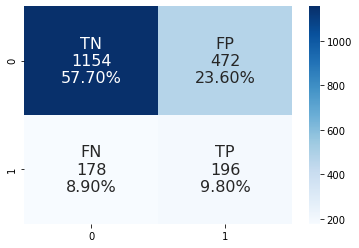

In [29]:
# display confusion matrix visualization
test_generator_2.reset()
pred_6a = model_vgg19.predict_generator(test_generator_2, steps = STEP_SIZE_TEST_2, verbose = 1)
y_true_2 = test_generator_2.classes
y_pred_6a = pred_6a > 0.5
make_confusion_matrix(y_true_2, y_pred_6a)

In [30]:
# get testing accuracy and loss
test_generator_2.reset()
score_6a = model_vgg19.evaluate_generator(test_generator_2, verbose = 1)

print("Loss: " + str(score_6a[0]))
print("Accuracy: " + str(score_6a[1]))
print("Precision: " + str(score_6a[2]))
print("Recall: " + str(score_6a[3]))
print("ROC-AUC: " + str(score_6a[4]))
print("PR-AUC: " + str(score_6a[5]))

2000/2000 [==============================] - 1355s 677ms/step - loss: 0.9490 - accuracy: 0.6750 - auc: 0.6720 - auc_1: 0.3223 - precision: 0.2934 - recall: 0.5241
Loss: 0.9489861726760864
Accuracy: 0.675000011920929
Precision: 0.6719781160354614
Recall: 0.3222977817058563
ROC-AUC: 0.2934131622314453
PR-AUC: 0.5240641832351685


# Predicting on Unlabeled Testing Set

In [ ]:
# for unlabeled testing set
test_generator = test_datagen.flow_from_directory(
    directory = pred_dir,
    class_mode = None,
    shuffle = False
)
# reset to avoid any unwanted outputs
test_generator.reset()
pred = model.predict_generator(test_generator, verbose=1, steps = STEP_TEST_SIZE)
pred_class = np.argmax(pred, axis=1)
l = dict((v,k) for k,v in train_generator.class_indices.items())
prednames = [l[k] for k in pred_classes]
filenames = test_generator.filenames
finaldf = pd.DataFrame({'Filename': filenames, "Prediction": prednames})